<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_ir3dataaug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ拡張

学習データの画像に対して移動、回転、拡大・縮小など人工的な操作を加えることでデータ数を水増しするテクニック

その一つがデータ拡張 (Data Augmentation) 

通常: データセットから指定した枚数だけ画像を選択し、ミニバッチを作成<br>
ImageDataGenerator: 画像を選択したあと、各画像にデータ拡張を行い、ミニバッチを作成<br>
→変換はリアルタイムなので保存するわけではない→ディスク容量を圧迫する心配なし！

### ベースモデルの作成

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

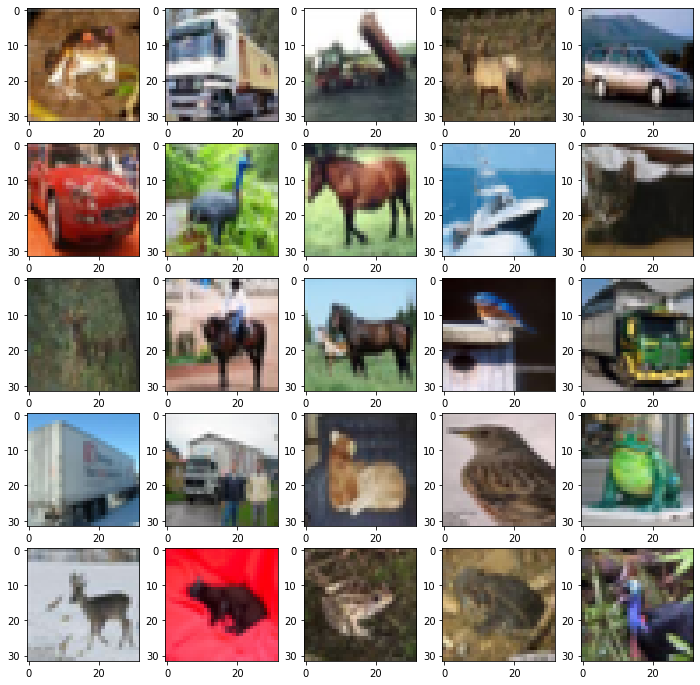

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
import os
import random


def reset_seed(seed=0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras import models, layers

# seedの固定
reset_seed(0)

# 定義
model = models.Sequential([
                           layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

# 最適化手法の設定
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# コンパイル
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
# 学習の詳細設定
batch_size = 1024
epochs =100

#実行
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/100
49/49 [==============================] - 2s 34ms/step - loss: 1.9382 - accuracy: 0.2988 - val_loss: 1.6603 - val_accuracy: 0.4117
Epoch 2/100
49/49 [==============================] - 1s 28ms/step - loss: 1.5510 - accuracy: 0.4452 - val_loss: 1.4355 - val_accuracy: 0.4868
Epoch 3/100
49/49 [==============================] - 1s 28ms/step - loss: 1.3934 - accuracy: 0.5050 - val_loss: 1.3399 - val_accuracy: 0.5307
Epoch 4/100
49/49 [==============================] - 1s 28ms/step - loss: 1.3006 - accuracy: 0.5406 - val_loss: 1.2574 - val_accuracy: 0.5517
Epoch 5/100
49/49 [==============================] - 1s 27ms/step - loss: 1.2158 - accuracy: 0.5737 - val_loss: 1.1832 - val_accuracy: 0.5871
Epoch 6/100
49/49 [==============================] - 1s 27ms/step - loss: 1.1382 - accuracy: 0.6029 - val_loss: 1.1789 - val_accuracy: 0.5856
Epoch 7/100
49/49 [==============================] - 1s 28ms/step - loss: 1.0804 - accuracy: 0.6254 - val_loss: 1.1084 - val_accuracy: 0.6079
Epoch 

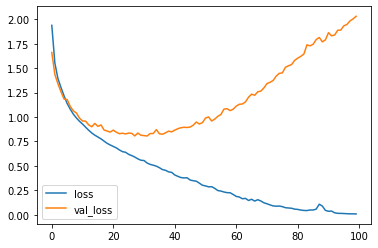

In [ ]:
results = pd.DataFrame(history.history)
results[['loss', 'val_loss']].plot()

過学習起こしてる

### 各処理

In [ ]:
# サンプルイメージ
img = x_train[4]

In [ ]:
#データ拡張のモジュール
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 処理を可視化する関数
def show(img, datagen):
  # (batch_size, width, channel)にreshape
  img_batch = img.reshape(1,32,32,3)

  # datagen.flow()でDataSetからAugmentation処理をしながらミニバッチ読み込み
  # 今回は1サンプルのセットをbatch_size=1で

  for img_augmented in datagen.flow(img_batch, batch_size=1):
    # batch_sizeの次元削減
    out = img_augmented.reshape(32,32,3)
    break

  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title('before')
  plt.imshow(img)

  plt.subplot(1,2,2)
  plt.title('after')
  plt.imshow(out)





回転

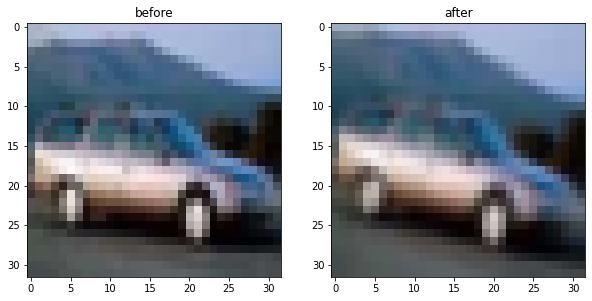

In [ ]:
datagen = ImageDataGenerator(rotation_range=60)

show(img, datagen)

水平移動

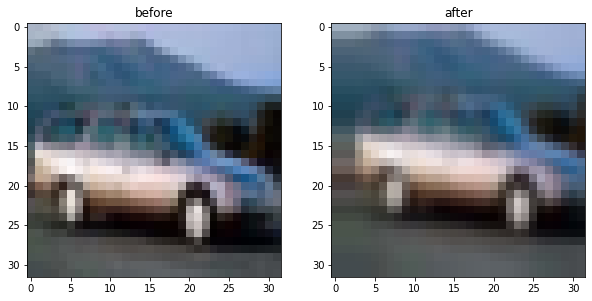

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.5, height_shift_range=0.5)

show(img, datagen)

せん断<br>
→平行四辺形にする

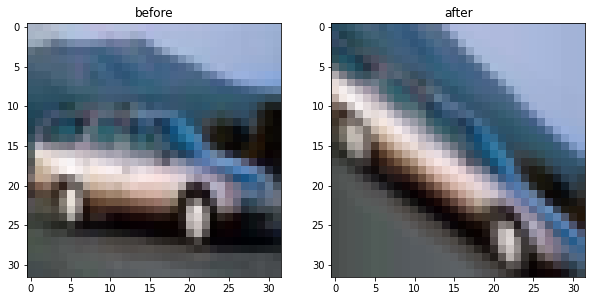

In [ ]:
datagen = ImageDataGenerator(shear_range=45)

show(img, datagen)

拡大

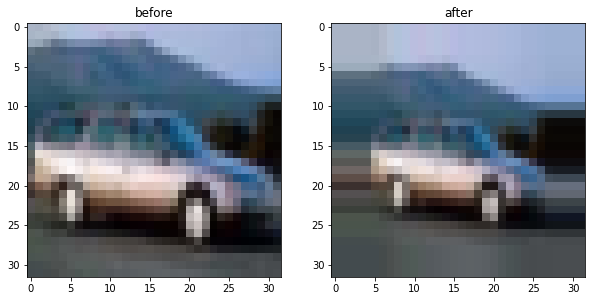

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.5)

show(img, datagen)

# -0.5~0.5の範囲で掛け算→拡大、縮小をしてくれる

水平反転<br>
→鏡面

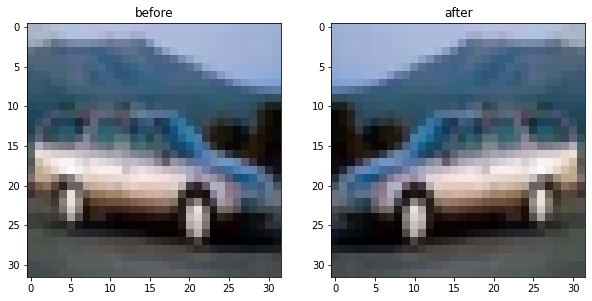

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

show(img, datagen)

垂直反転

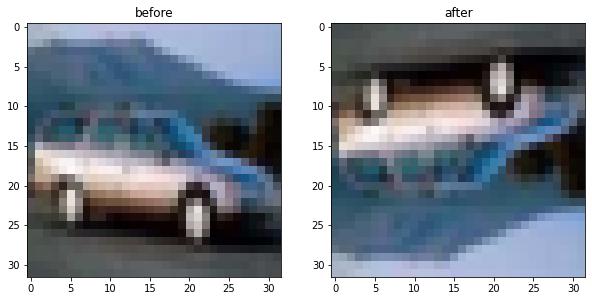

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)

show(img, datagen)

option: fill_mode<br>
変形により空白ができるときにどう埋めるか

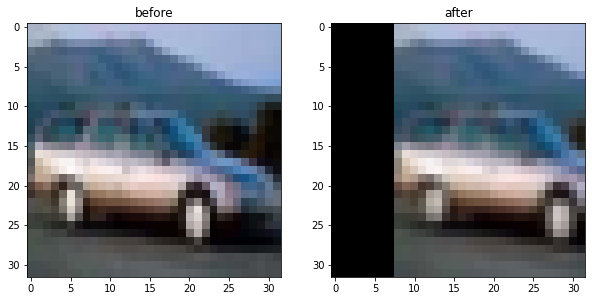

In [ ]:
# constant
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='constant')

show(img, datagen)

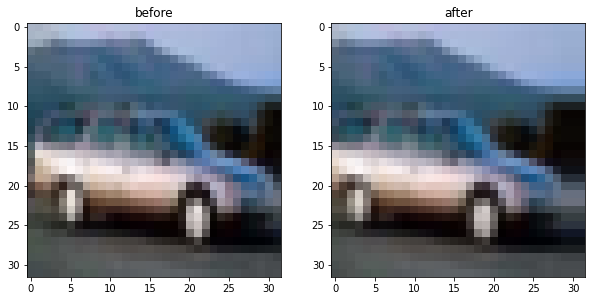

In [ ]:
# nearest(default)
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='nearest')

show(img, datagen)

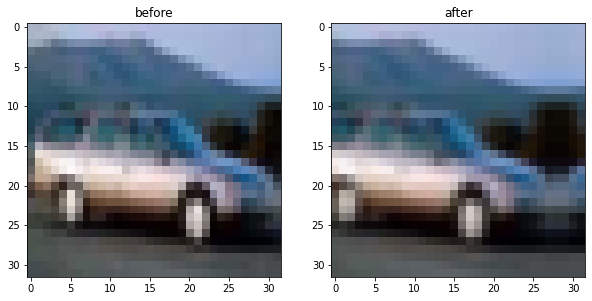

In [ ]:
# reflect→鏡面を
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='reflect')

show(img, datagen)

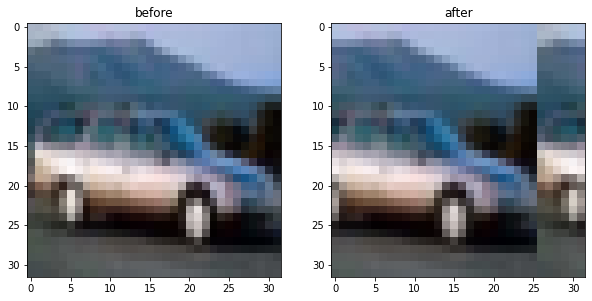

In [ ]:
# wrap(外れたとこまるまる)
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='wrap')

show(img, datagen)

### 画像の保存

In [ ]:
from tensorflow.keras.preprocessing import image

# サンプル画像
img = x_train[4]

# 水増し
datagen = ImageDataGenerator(vertical_flip=True)

#reshape(batchsize, height, width, channel)
img_batch = img.reshape(1,32,32,3)

# 1枚のみ保存
max_img_num = 1
counts = 1

for img_augmented in datagen.flow(img_batch, batch_size=1):
  # 次元削減
  img_augmented = img_augmented.reshape(32,32,3)
  # 保存
  image.save_img('augmented_output.png', img_augmented)
  # max_img_numの枚数保存したら終了
  if (counts % max_img_num) == 0:
    print("Finish!")
    break

  counts += 1


Finish!


### 精度の変化

In [ ]:
# 適用したいデータ拡張の種類を定義
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
batch_size = 1024
epochs = 100

history = model.fit_generator(datagen.flow(x_train, t_train,batch_size=batch_size),
                              steps_per_epoch = len(x_train) / batch_size,
                              epochs = epochs,
                              validation_data = (x_test, t_test))

Epoch 1/100
49/48 [==============================] - 2s 49ms/step - loss: 2.0112 - accuracy: 0.1354 - val_loss: 1.7866 - val_accuracy: 0.0369
Epoch 2/100
49/48 [==============================] - 2s 46ms/step - loss: 1.6884 - accuracy: 0.0963 - val_loss: 1.5997 - val_accuracy: 0.1153
Epoch 3/100
49/48 [==============================] - 2s 46ms/step - loss: 1.5570 - accuracy: 0.0982 - val_loss: 1.5142 - val_accuracy: 0.0797
Epoch 4/100
49/48 [==============================] - 2s 46ms/step - loss: 1.4896 - accuracy: 0.0969 - val_loss: 1.4487 - val_accuracy: 0.0486
Epoch 5/100
49/48 [==============================] - 2s 47ms/step - loss: 1.4270 - accuracy: 0.0950 - val_loss: 1.3950 - val_accuracy: 0.0809
Epoch 6/100
49/48 [==============================] - 2s 47ms/step - loss: 1.3669 - accuracy: 0.0959 - val_loss: 1.3391 - val_accuracy: 0.0952
Epoch 7/100
49/48 [==============================] - 2s 47ms/step - loss: 1.3349 - accuracy: 0.0955 - val_loss: 1.3318 - val_accuracy: 0.1299
Epoch 

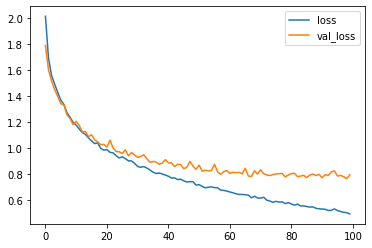

In [ ]:
results = pd.DataFrame(history.history)

results[['loss', 'val_loss']].plot()

データ拡張は、簡単な処理でありながら手軽に精度向上に貢献してくれる重要な手法<br>
最新の手法では、適用していないモデルは無いと言ってよいほどスタンダードになっている